## IMPORTS

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import rsi_help as rh
nt = None  # default='warn'

## Fetching data

### name = name of the stock or cryptocurrency we want to fetch
### start = date to start fetching from
### end = date to finish fetching to

In [12]:
name = "BTC"
start = "2020-01-01"
end = "2021-10-25"

data = yf.download(name,start,end)

[*********************100%***********************]  1 of 1 completed


## Creating Necessary Columns

In [14]:

data['Up Move'] = np.nan
data['Down Move'] = np.nan
data['Average Up'] = np.nan
data['Average Down'] = np.nan
    
    # Relative Strength
data['RS'] = np.nan

    # Relative Strength Index
data['RSI'] = np.nan


## Calculating RSI Values
### $RS = \frac{U}{D} $
### U = average number of positive price changes
### D = average number of negative price changes
## $RSI = 100.0 - \frac{100.0}{1.0+RS}$


In [15]:
def calculateRsi(data):
    data = rh.fillMoves(data)
    for _day in range (1,len(data)):
        if(~(data['Down Move'][_day]>0)):
            data['Down Move'][_day]=0
    data = rh.fillRsi(data)
    return data

data = calculateRsi(data)
data[:20]

,Open,High,Low,Close,Adj Close,Volume,Up Move,Down Move,Average Up,Average Down,RS,RSI
Date,,,,,,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,0.000000,0.004997,NaN,NaN,NaN,NaN
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,0.034996,0.000000,NaN,NaN,NaN,NaN
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,0.000000,0.110001,NaN,NaN,NaN,NaN
2020-10-08,99.989998,99.995003,99.971703,99.995003,99.995003,650,0.075005,0.000000,NaN,NaN,NaN,NaN
2020-10-09,99.970001,99.980003,99.940002,99.940002,99.940002,1820,0.000000,0.055000,NaN,NaN,NaN,NaN
2020-10-12,99.959999,99.970001,99.940002,99.940002,99.940002,5685,0.000000,0.000000,NaN,NaN,NaN,NaN
2020-10-13,99.978996,99.989998,99.963203,99.964996,99.964996,3635,0.024994,0.000000,NaN,NaN,NaN,NaN
2020-10-14,100.000000,100.000000,99.974998,99.974998,99.974998,3985,0.010002,0.000000,NaN,NaN,NaN,NaN


## Plotting

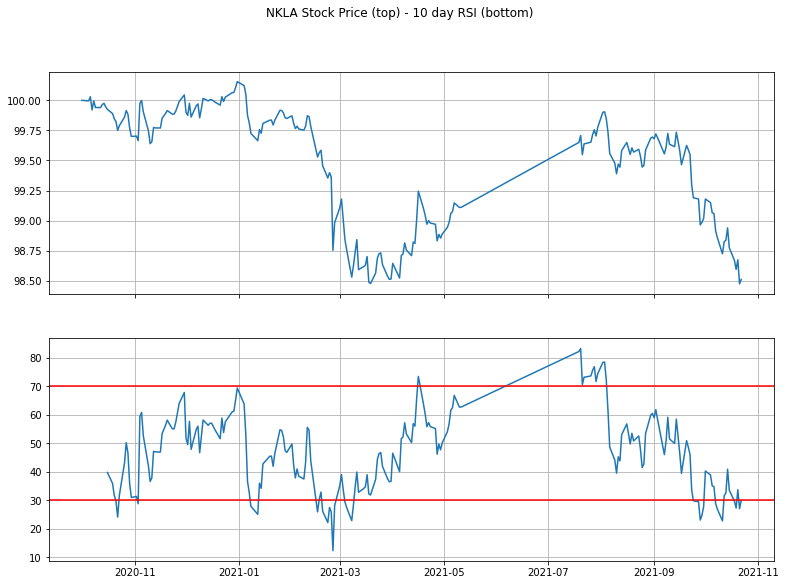

In [16]:
import matplotlib.pyplot as plt

rh.pltRsi(data)

## BUY AND SELL SIGNALS

In [17]:
# Calculate the buy & sell signals
## Initialize the columns that we need
data['Long Tomorrow'] = np.nan
data['Buy Signal'] = np.nan
data['Sell Signal'] = np.nan
data['Buy RSI'] = np.nan
data['Sell RSI'] = np.nan
data['Strategy'] = np.nan

### Generate Buy&Sell signals

In [18]:

data = rh.calculateSignals(data)

### Signal plotting (Exit / Entry)

,Open,High,Low,Close,Adj Close,Volume,Up Move,Down Move,Average Up,Average Down,RS,RSI,Long Tomorrow,Buy Signal,Sell Signal,Buy RSI,Sell RSI,Strategy
Date,,,,,,,,,,,,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,0.000000,0.004997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,0.034996,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,0.000000,0.110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-08,99.989998,99.995003,99.971703,99.995003,99.995003,650,0.075005,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,98.669998,98.669998,98.669998,98.669998,98.669998,2,0.000000,0.105003,0.027572,0.065218,0.422767,29.714413,1.0,NaN,NaN,NaN,NaN,NaN
2021-10-19,98.580002,98.595001,98.580002,98.595001,98.595001,254,0.000000,0.074997,0.024815,0.066196,0.374869,27.265816,1.0,NaN,NaN,NaN,NaN,NaN
2021-10-20,98.570000,98.690002,98.570000,98.674500,98.674500,845,0.079498,0.000000,0.030283,0.059576,0.508308,33.700565,1.0,NaN,NaN,NaN,NaN,NaN


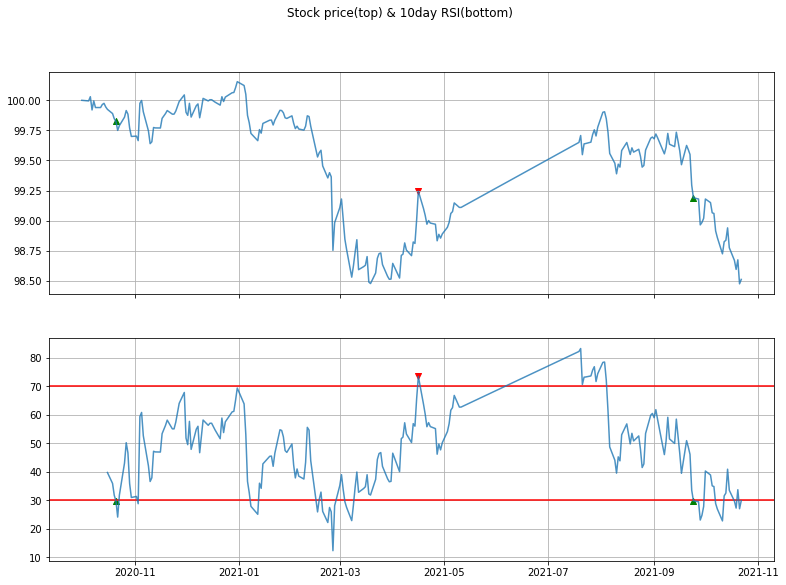

In [19]:

rh.pltSignals(data)

## Perfomance:

In [23]:
rh.analyseRSI(data)
## Trade Performance
trade_count = data['Sell Signal'].count()
print('Strategy yield', trade_count , 'trades')

buy_prices = []
sell_prices = []
budget = 1000

for day in range(11,len(data)):
    
    if (data['Buy Signal'][day] > 0):
#        print('kupljeno na:' , data['Buy Signal'][day])
       buy_prices.append(data['Buy Signal'][day])
        
    if (data['Sell Signal'][day]> 0):S
#        print('prodano na', data['Sell Signal'][day])
        sell_prices.append(data['Sell Signal'][day])

for i in range(0,trade_count):
    print('******************************************************************')
    print('------------KUPUJEM------------')
    print('cijena pri kupovini: ', buy_prices[i])
    amount = budget/buy_prices[i]
    budget = 0
    print('kupio sam: ', amount, " stanje nakon kupovine: ", budget)

    print('------------PRODAJEM------------')
    print('cijena pri prodaji: ', sell_prices[i])
    budget = budget + amount*sell_prices[i]
    print('prodao sam: ', amount, ' stanje nakon prodaje: ', budget)
    amount = 0
    print('******************************************************************')
    print('\n')


        



""" ## Avg Profit per trade
average_profit = ((data['Strategy'][-1] / data['Strategy'][11]) ** (1/trade_count)) - 1

## Number of days per trade
total_days = data['Long Tomorrow'].count()
average_days = int(total_days/trade_count)
 """

IndentationError: unexpected indent (Temp/ipykernel_13028/2345836914.py, line 18)

In [22]:
data.to_excel("RSI_data_table.xlsx")